<a href="https://colab.research.google.com/github/Abhishek3102/ML/blob/main/MNIST_Handwritten_Digit_Classification_with_Neural_Network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
import tensorflow as tf
tf.random.set_seed(3)
from tensorflow import keras
from keras.datasets import mnist
from tensorflow._api.v2.math import confusion_matrix

**Loading the MNIST data from keras dataset**

In [ ]:
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

11490434/11490434 [==============================] - 1s 0us/step


In [ ]:
type(X_train)

numpy.ndarray

In [ ]:
print(X_train.shape, Y_train.shape, X_test.shape, Y_test.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


**Training data = 60,000 Images**

**Test data = 10,000 Images**

Image dimension --> 28 x 28

Greyscale Image --> 1 channel

In [ ]:
print(X_train[6])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0 145 255 211  31   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  32 237 253 252  71   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  11 175 253 252  71   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0 144 253 252  71   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  16 191 253 252  7

In [ ]:
print(X_train[6].shape)

(28, 28)


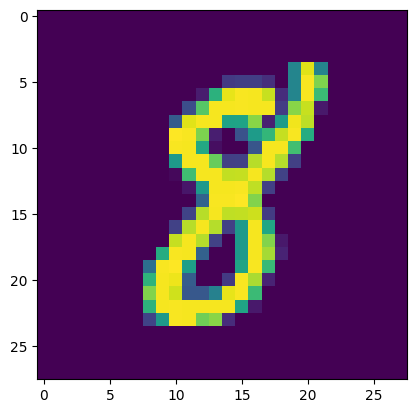

8


In [ ]:
# Displaying the image
plt.imshow(X_train[41])
plt.show()

# Printing the corresponding label
print(Y_train[41])

In [ ]:
# Unique values in Y_train
print(np.unique(Y_train))

print(np.unique(Y_test))

[0 1 2 3 4 5 6 7 8 9]
[0 1 2 3 4 5 6 7 8 9]


All the images have same dimension in this dataset else make the dimensions same

In [ ]:
# Scaling the values (so that all values range within 0 to 1)
X_train = X_train/255
X_test = X_test/255

In [ ]:
print(X_train[41])

[[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00

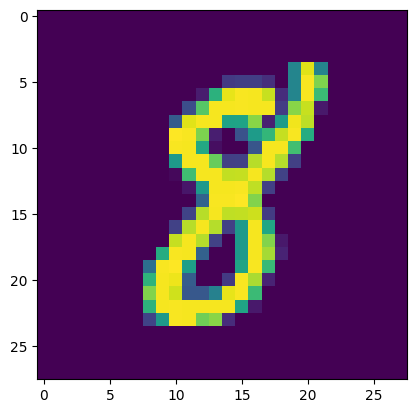

8


In [ ]:
plt.imshow(X_train[41])
plt.show()

print(Y_train[41])

**Building the Neural Network**

In [ ]:
# Setting up the layers of neural network
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(50, activation='relu'),
    keras.layers.Dense(50, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

In [ ]:
# Compiling the neural network
model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])

In [ ]:
# Training the neural network
model.fit(X_train, Y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 6s 2ms/step - loss: 1.0134 - accuracy: 0.6744
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4998 - accuracy: 0.8523
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3843 - accuracy: 0.8884
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3374 - accuracy: 0.9019
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3114 - accuracy: 0.9094
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2905 - accuracy: 0.9145
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2730 - accuracy: 0.9201
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2552 - accuracy: 0.9257
Epoch 9/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2405 - accuracy: 0.9303
Epoch 10/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.226

**Training data accuracy is 93.44 %**

**Accuracy on test data**

In [ ]:
loss, accuracy = model.evaluate(X_test, Y_test)
print(accuracy)

313/313 [==============================] - 2s 4ms/step - loss: 0.2213 - accuracy: 0.9343
0.9343000054359436


**Test data accuracy is 93.43 %**

In [ ]:
print(X_test.shape)

(10000, 28, 28)


The label of first image in Y_test is : 7


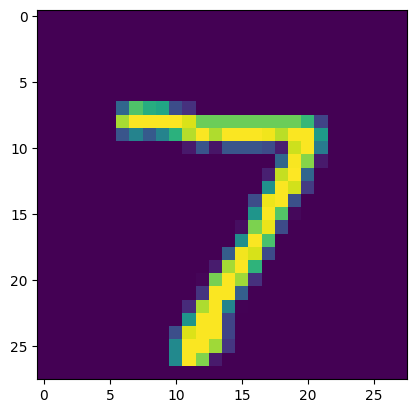

In [ ]:
plt.imshow(X_test[0])
plt.show

print("The label of first image in Y_test is :",Y_test[0])

In [ ]:
Y_predict = model.predict(X_test)

313/313 [==============================] - 1s 1ms/step


In [ ]:
print(Y_predict.shape)

(10000, 10)


In [ ]:
print(Y_predict[0])

[6.4367376e-02 8.1126159e-04 7.7398562e-01 8.5611379e-01 8.1454986e-05
 1.7094094e-01 6.7399442e-09 9.9947208e-01 4.9098440e-02 4.4069216e-01]


In [ ]:
# Converting the prediction probabilities to class label for all test data points
Y_predict_labels = [np.argmax(i) for i in Y_predict]
print(Y_predict_labels)

[7, 2, 1, 0, 4, 1, 4, 9, 6, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4, 9, 6, 6, 5, 4, 0, 7, 4, 0, 1, 3, 1, 3, 6, 7, 2, 7, 1, 3, 1, 1, 7, 4, 2, 3, 5, 1, 2, 4, 4, 6, 3, 5, 5, 6, 0, 4, 1, 9, 5, 7, 8, 9, 3, 7, 4, 2, 4, 3, 0, 7, 0, 2, 9, 1, 7, 3, 2, 9, 7, 7, 6, 2, 7, 8, 4, 7, 5, 6, 1, 3, 6, 4, 3, 1, 4, 1, 7, 6, 9, 6, 0, 5, 4, 9, 9, 2, 1, 9, 4, 8, 7, 3, 9, 7, 4, 4, 4, 9, 8, 5, 4, 7, 6, 7, 9, 0, 5, 8, 5, 6, 6, 5, 7, 8, 1, 0, 1, 6, 4, 6, 7, 3, 1, 7, 1, 8, 2, 0, 9, 9, 8, 5, 5, 1, 5, 6, 0, 3, 4, 4, 6, 5, 4, 6, 5, 4, 5, 1, 4, 4, 7, 2, 3, 2, 7, 1, 8, 1, 8, 1, 8, 5, 0, 8, 9, 2, 5, 0, 1, 1, 1, 0, 9, 0, 5, 1, 6, 4, 2, 3, 6, 1, 1, 1, 3, 9, 5, 2, 9, 4, 5, 9, 3, 9, 0, 3, 5, 5, 5, 7, 2, 2, 7, 1, 2, 8, 4, 1, 7, 3, 3, 8, 7, 7, 9, 2, 2, 4, 1, 5, 8, 8, 7, 2, 3, 0, 2, 4, 2, 4, 1, 9, 5, 7, 7, 2, 8, 2, 0, 8, 5, 7, 7, 9, 1, 8, 1, 8, 0, 3, 0, 1, 9, 9, 4, 1, 8, 2, 1, 2, 9, 7, 5, 9, 2, 6, 4, 1, 5, 4, 2, 9, 2, 0, 4, 0, 0, 2, 8, 4, 7, 1, 2, 4, 0, 2, 7, 4, 3, 3, 0, 0, 5, 1, 9, 6, 5, 2, 5, 1, 7, 9, 3, 5, 9, 2, 0, 7, 1, 1, 2, 1, 

**Y_test --> True labels**

**Y_predict_labels --> Predicted labels**

Confusion Matrix

In [ ]:
conf_mat = confusion_matrix(Y_test, Y_predict_labels)

In [ ]:
print(conf_mat)

tf.Tensor(
[[ 951    0    2    1    1   11   11    2    1    0]
 [   0 1108    3    3    1    3    3    1   12    1]
 [  12    1  952   12    4    1   10   10   27    3]
 [   0    1   20  925    1   33    0    9   18    3]
 [   1    2    5    0  916    1   14    2    5   36]
 [  10    3    3   17    3  808   13    5   22    8]
 [   8    3    4    0   12   16  912    0    3    0]
 [   3   10   17    5    3    0    0  964    1   25]
 [   4   11    4   16   11   30    8   10  873    7]
 [  10    8    1    8   24    8    0   11    5  934]], shape=(10, 10), dtype=int32)


Text(0.5, 47.7222222222222, 'Predicted Label')

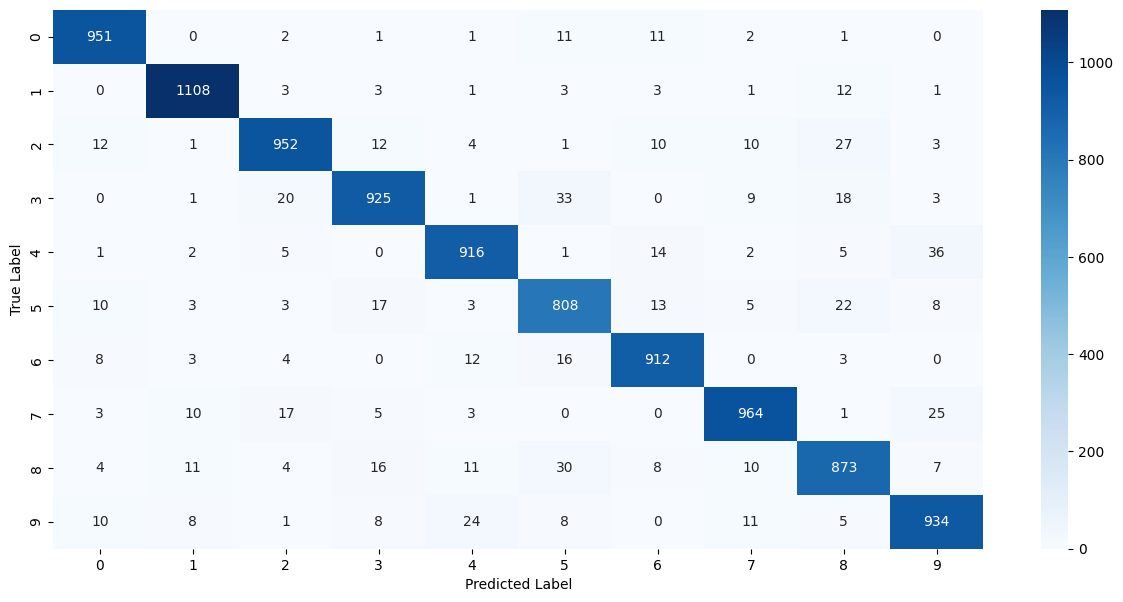

In [ ]:
# Building a heatmap
plt.figure(figsize=(15,7))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')

**Build a predictive system**

In [ ]:
input_image_path = "/content/MNIST_digit.png"

input_image = cv2.imread(input_image_path)

In [ ]:
type(input_image)

numpy.ndarray

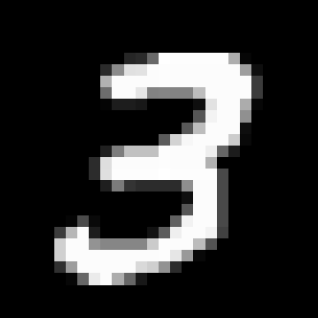

In [ ]:
cv2_imshow(input_image)

In [ ]:
input_image.shape

(318, 318, 3)

In [ ]:
# Converting the image to grayscale because opencv thought that this is a coloured image.
# Since all the images in the dataset were grayscale images, hence this also needs to be grayscale

grayscale_image = cv2.cvtColor(input_image, cv2.COLOR_BGR2GRAY)

In [ ]:
grayscale_image.shape
# The 3 is removed which means the image has been converted to grayscale

(318, 318)

In [ ]:
# Resize the image
image_resize = cv2.resize(grayscale_image, (28,28))

In [ ]:
print(image_resize.shape)

(28, 28)


In [ ]:
cv2_imshow(image_resize)

In [ ]:
input_image_resize = image_resize/255

In [ ]:
image_reshaped = np.reshape(input_image_resize, (1,28,28))

In [ ]:
input_prediction = model.predict(image_reshaped)
print(input_prediction)

1/1 [==============================] - 0s 59ms/step
[[0.000000e+00 0.000000e+00 1.000000e+00 1.000000e+00 0.000000e+00
  0.000000e+00 0.000000e+00 0.000000e+00 1.000000e+00 5.357812e-09]]


In [ ]:
input_pred_label = np.argmax(input_prediction)
print(input_pred_label)

2


Predictive System


In [ ]:
input_image_path = input("Path of the image to be predicted: ")
input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

grayscale = cv2.cvtColor(input_image, cv2.COLOR_BGR2GRAY)

input_image_resize = cv2.resize(grayscale, (28,28))

input_image_resize = input_image_resize/255

image_reshaped = np.reshape(input_image_resize, (1,28,28))

input_prediction = model.predict(image_reshaped)

input_pred_label  = np.argmax(input_prediction)

print("The handwritten image is recognized as ", input_pred_label)